# Kaggle data visualization

Import libraries for using Dataframes and plotting

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the dataset into memory, the data is about used cars general information from the US

In [34]:
df=pd.read_csv('./assets/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Remove unnecessary columns from the dataset

In [35]:
df.drop(['Unnamed: 0','vin', 'lot'],axis=1,inplace=True)
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


Print a brief description of the dataset

In [36]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


## Histogram plot of the price column of the dataset

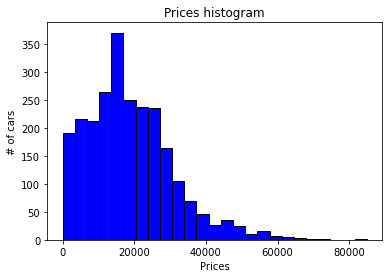

In [37]:
plt.hist(df['price'], bins=25, color='b', edgecolor = 'black')
plt.title('Prices histogram')
plt.xlabel("Prices")
plt.ylabel("# of cars")
plt.show()

## Scatterplot with histogram of the variables price and mileage

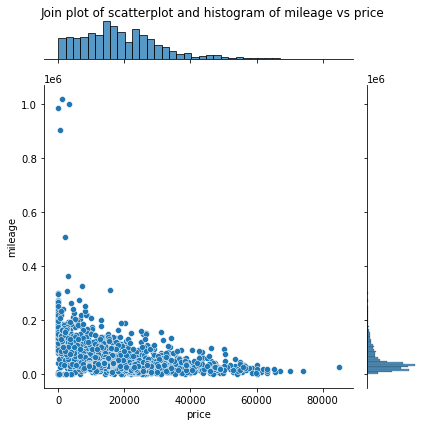

In [44]:
# sns.jointplot(x=df['price'], y=df['mileage'])
p = sns.jointplot(x = df['price'], y = df['mileage'])
p.fig.suptitle("Join plot of scatterplot and histogram of mileage vs price")
#p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

## Box plot of the prices among different brands of cars

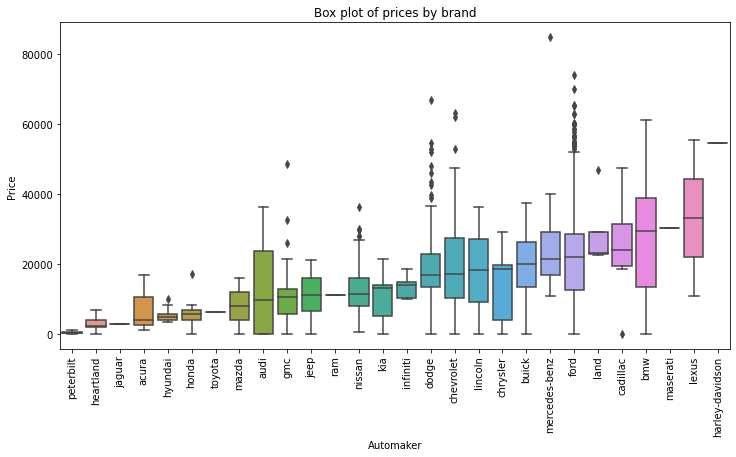

In [46]:
plt.figure(figsize=(12,6))
sorted_nb = df.groupby(['brand'])['price'].median().sort_values()
sns.boxplot(x=df['brand'], y=df['price'], order=list(sorted_nb.index))
plt.xticks(rotation=90)
plt.title('Box plot of prices by brand')
plt.ylabel("Price")
plt.xlabel("Automaker")
plt.show()

## Heat map of the correlation between of all the numeric variables of the dataset

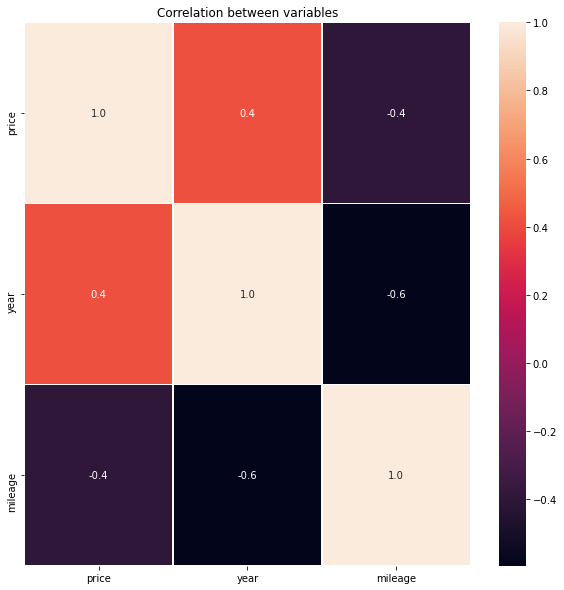

In [38]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation between variables')
plt.show()